Index(['label', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Logistic Regression Model Evaluation:
Accuracy: 0.942

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        86
           1       0.91      0.94      0.92        51

    accuracy                           0.94       137
   macro avg       0.93      0.94      0.94       137
weighted a

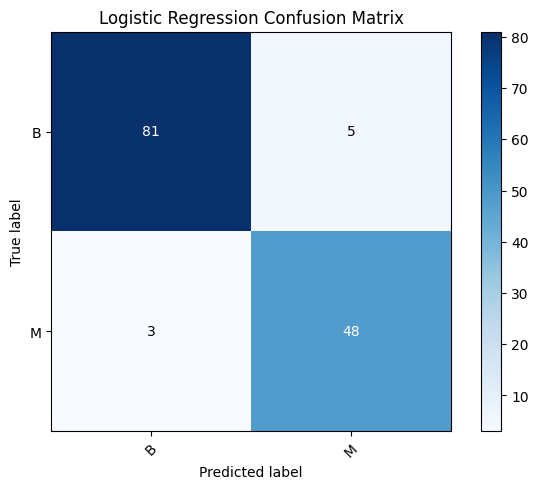

Logistic Regression with L2 Regularization Model Evaluation:
Accuracy: 0.934

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        86
           1       1.00      0.82      0.90        51

    accuracy                           0.93       137
   macro avg       0.95      0.91      0.93       137
weighted avg       0.94      0.93      0.93       137


Cross-validation scores: [0.984375   0.921875   0.96875    0.9047619  0.92063492]
Mean CV score: 0.940 (+/- 0.062)


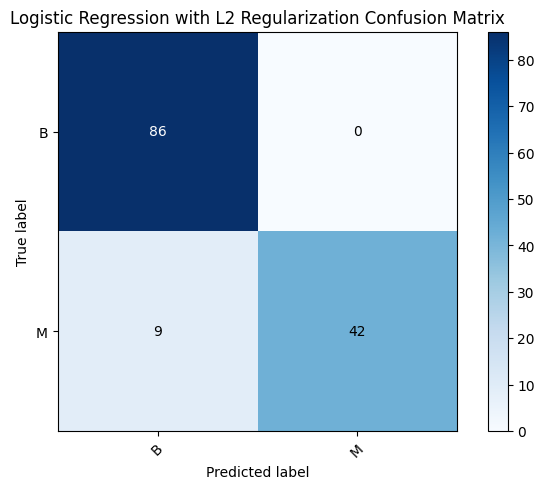

Logistic Regression with L1 Regularization Model Evaluation:
Accuracy: 0.956

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        86
           1       0.89      1.00      0.94        51

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.95       137
weighted avg       0.96      0.96      0.96       137


Cross-validation scores: [0.625      0.625      0.625      0.93650794 0.88888889]
Mean CV score: 0.740 (+/- 0.283)


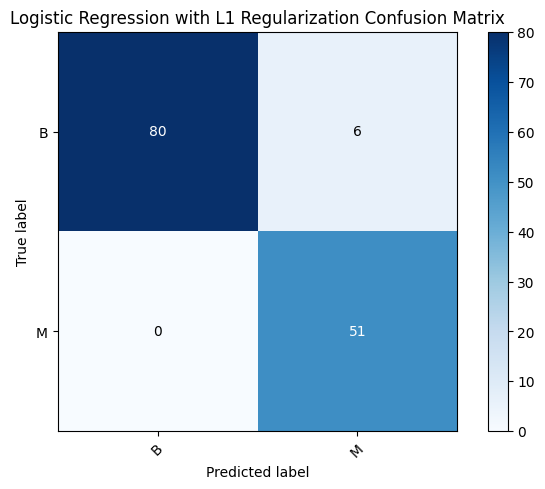

SVM Accuracy: 0.964


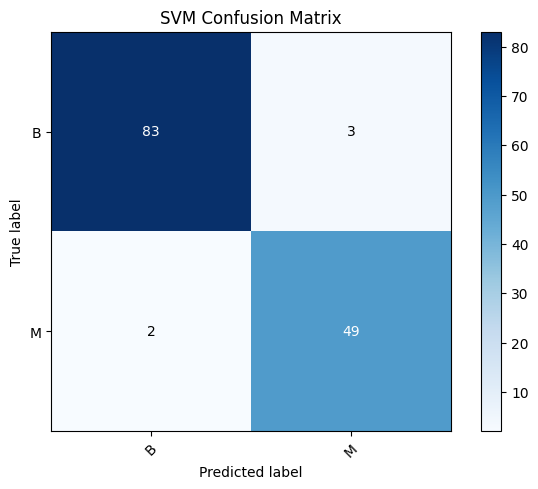

Decision Tree Accuracy: 0.927


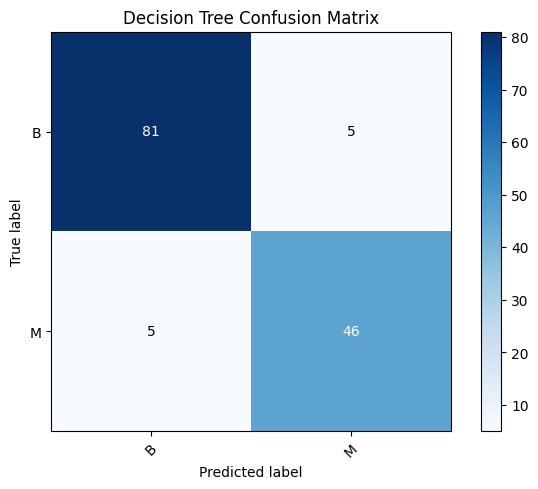

Random Forest Accuracy: 0.949


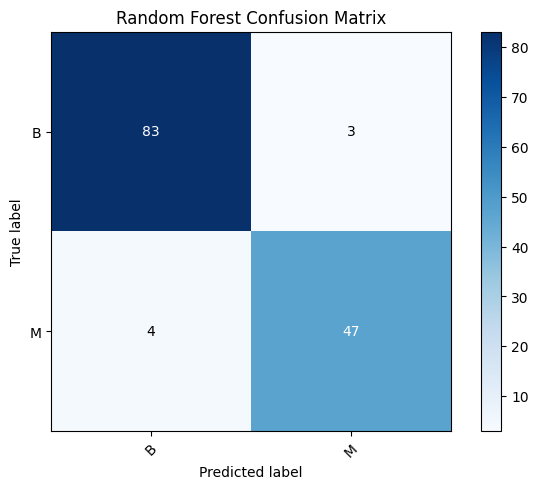

KNN Accuracy: 0.985


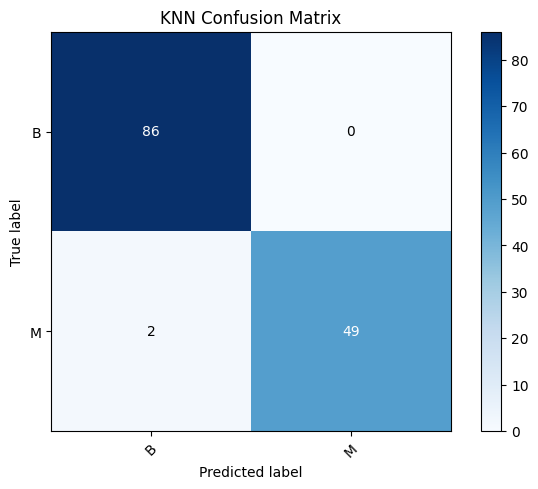

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load data < retrieve from: https://www.kaggle.com/competitions/breast-cancer-classification-summer-2024/submissions
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')  # only for testing the model on according to kaggle

# Data check up
#print("\nFirst 5 rows of the data:\n", train.head())

# Check for null columns
#print("\nChecking for null values:\n", train.isnull().sum())

# Check on distribution and have in case we need to check on the data's mean's/std's/etc.
#print("\nBasic statistics:\n", train.describe())


# Drop non-informative columns
train = train.drop(columns=['id'])

# Print columns to check for 'id' and 'label'
print(train.columns)

# Define features and target
X = train.drop(columns=['label'])
y = train['label'].map({'M': 1, 'B': 0})

# Split the data
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_validate_std = sc.transform(X_validate)

# Function to plot confusion matrix with volumes
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add text annotations
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Train and evaluate Logistic Regression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_validate_std)
y_pred_proba = lr.predict_proba(X_validate_std)[:, 1]

print("Logistic Regression Model Evaluation:")
print(f'Accuracy: {accuracy_score(y_validate, y_pred):.3f}')
print("\nClassification Report:")
print(classification_report(y_validate, y_pred))

cv_scores = cross_val_score(lr, X_train_std, y_train, cv=5)
print("\nCross-validation scores:", cv_scores)
print(f"Mean CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

plot_confusion_matrix(y_validate, y_pred, classes=['B', 'M'], title='Logistic Regression Confusion Matrix')

# Train and evaluate Logistic Regression with L2 Regularization
lr_l2 = LogisticRegression(C=0.01, penalty='l2', random_state=1)
lr_l2.fit(X_train_std, y_train)

y_pred_l2 = lr_l2.predict(X_validate_std)
y_pred_proba_l2 = lr_l2.predict_proba(X_validate_std)[:, 1]

print("Logistic Regression with L2 Regularization Model Evaluation:")
print(f'Accuracy: {accuracy_score(y_validate, y_pred_l2):.3f}')
print("\nClassification Report:")
print(classification_report(y_validate, y_pred_l2))

cv_scores_l2 = cross_val_score(lr_l2, X_train_std, y_train, cv=5)
print("\nCross-validation scores:", cv_scores_l2)
print(f"Mean CV score: {cv_scores_l2.mean():.3f} (+/- {cv_scores_l2.std() * 2:.3f})")

plot_confusion_matrix(y_validate, y_pred_l2, classes=['B', 'M'], title='Logistic Regression with L2 Regularization Confusion Matrix')

# Train and evaluate Logistic Regression with L1 Regularization
lr_l1 = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', random_state=1)
lr_l1.fit(X_train_std, y_train)

y_pred_l1 = lr_l1.predict(X_validate_std)
y_pred_proba_l1 = lr_l1.predict_proba(X_validate_std)[:, 1]

print("Logistic Regression with L1 Regularization Model Evaluation:")
print(f'Accuracy: {accuracy_score(y_validate, y_pred_l1):.3f}')
print("\nClassification Report:")
print(classification_report(y_validate, y_pred_l1))

cv_scores_l1 = cross_val_score(lr_l1, X_train_std, y_train, cv=5)
print("\nCross-validation scores:", cv_scores_l1)
print(f"Mean CV score: {cv_scores_l1.mean():.3f} (+/- {cv_scores_l1.std() * 2:.3f})")

plot_confusion_matrix(y_validate, y_pred_l1, classes=['B', 'M'], title='Logistic Regression with L1 Regularization Confusion Matrix')

# Train and evaluate Support Vector Machine
svm = SVC(kernel='linear', C=1.0, probability=True, random_state=1)
svm.fit(X_train_std, y_train)

y_pred = svm.predict(X_validate_std)
y_pred_proba = svm.predict_proba(X_validate_std)[:, 1]

print(f'SVM Accuracy: {accuracy_score(y_validate, y_pred):.3f}')
plot_confusion_matrix(y_validate, y_pred, classes=['B', 'M'], title='SVM Confusion Matrix')

# Train and evaluate Decision Tree
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_validate)
print(f'Decision Tree Accuracy: {accuracy_score(y_validate, y_pred):.3f}')
plot_confusion_matrix(y_validate, y_pred, classes=['B', 'M'], title='Decision Tree Confusion Matrix')

# Train and evaluate Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_validate)
print(f'Random Forest Accuracy: {accuracy_score(y_validate, y_pred):.3f}')
plot_confusion_matrix(y_validate, y_pred, classes=['B', 'M'], title='Random Forest Confusion Matrix')

# Train and evaluate K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

y_pred = knn.predict(X_validate_std)
print(f'KNN Accuracy: {accuracy_score(y_validate, y_pred):.3f}')
plot_confusion_matrix(y_validate, y_pred, classes=['B', 'M'], title='KNN Confusion Matrix')


In [22]:
# Choose the best model based on accuracy
best_model = knn 

# Preprocess the test data
X_validate_std_final = sc.transform(test.drop(columns=['id']))

# Make predictions on the test data
test_predictions = best_model.predict(X_validate_std_final)

# Create a submission file
submission = pd.DataFrame({
    'id': test['id'],
    'label': test_predictions
})
submission['label'] = submission['label'].map({1: 'M', 0: 'B'})  # Map predictions back to 'M' and 'B'

print(submission)

# Save the submission file
submission.to_csv('../data/processed/submission.csv', index=False)

           id label
0      906564     B
1       85715     M
2      891670     B
3      874217     M
4      905680     B
..        ...   ...
109     87164     M
110  84348301     M
111    859471     B
112    911150     B
113  90944601     B

[114 rows x 2 columns]
